In [24]:
#importing libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
#importing the training dataset
train_df=pd.read_csv("traindataset.csv")
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [16]:
#checking for missing values
train_df.isna().sum()

x    0
y    1
dtype: int64

In [17]:
#Filling the missing value with mean
train_df.y.fillna(train_df.y.mean(),inplace=True)

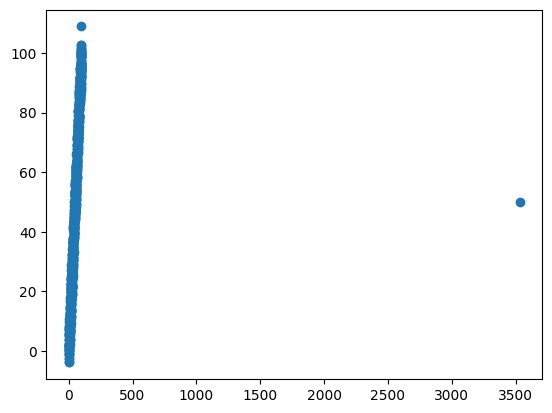

In [19]:
#Plotting data to find outliers
plt.scatter(train_df.x,train_df.y)

In [20]:
#Accessing the outlier index
train_df.y.index[train_df['x']>=3500]

Index([213], dtype='int64')

In [21]:
#Removing outliers
train_df.drop(213,inplace=True)

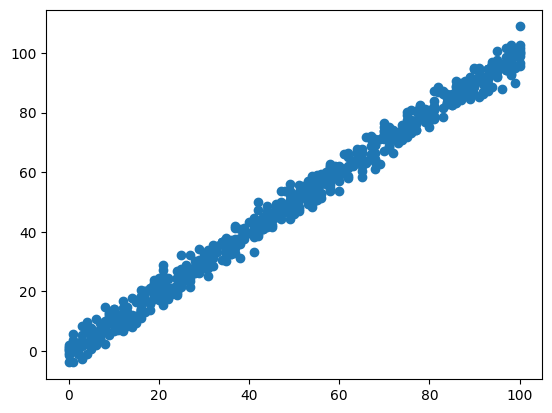

In [22]:
#plot without outlier
plt.scatter(train_df.x,train_df.y)

In [23]:
#Converting dataset into array and reshaping
x=np.array(train_df.x)
y=np.array(train_df.y)
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [25]:
#splitting the data to 2 parts - training and validation
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.9)

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_val)

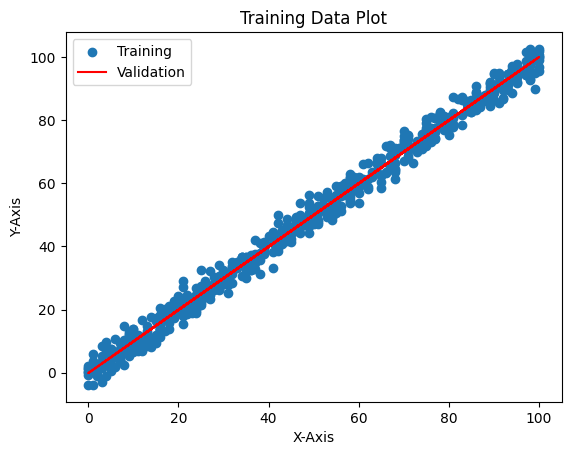

In [37]:
#plotting training data  and validation
plt.scatter(x_train,y_train,label='Training')
plt.plot(x_val,lr.predict(x_val),color='r',label='Validation')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Training Data Plot')
plt.legend()
plt.show()

In [31]:
#Extracting Test Dataset
test_df=pd.read_csv("testdataset.csv")
test_df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [32]:
#reshaping test data array
x_test=np.array(test_df.x)
y_test=np.array(test_df.y)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [33]:
#Accuracy of algorithm
Y_predict=lr.predict(x_test)
lr.score(Y_predict,y_test)

0.988709059304168

In [34]:
#root mean squared error of the algorithm
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_predict,squared=False)

3.0738356498037738

In [36]:
#Absolute error score of the algorithm
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test,Y_predict)

0.9018811272684738

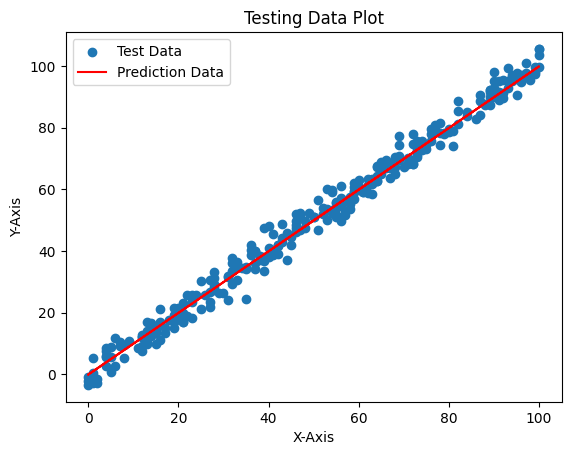

In [38]:
#plotting test data
plt.scatter(x_test,y_test,label='Test Data')
plt.plot(x_test,Y_predict,color='r',label='Prediction Data')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Testing Data Plot')
plt.legend()
plt.show()